# Projet AirBnB - Prétraitement des Données (Side Quest)
### Ce notebook a pour objectif de préparer le dataset pour la prédiction du prix d'un logement sur Airbnb.
### Il est structuré en plusieurs sections : chargement et exploration des données, prétraitement, et séparation des données pour une future modélisation.
### Chaque membre pourra compléter sa partie en fonction de son rôle.

 ## Table des Matières
### 1. Introduction
### 2. Chargement et Exploration des Données
### 3. Prétraitement des Données
###    - 3.1 Sélection des Colonnes Pertinentes
###    - 3.2 Suppression des Doublons
###    - 3.3 Gestion des Valeurs Manquantes
###    - 3.4 Conversion des Types de Données
###    - 3.5 Gestion des Valeurs Aberrantes
### 4. Séparation des Données (Train/Test Split)
### 5. Bonus: Préparation pour la Régression Linéaire
### 6. Conclusion et Perspectives


## 1. Introduction
### Dans ce projet, nous préparons le dataset AirBnB afin de prédire le prix des logements.
### Ce notebook se concentre sur la partie prétraitement des données avant l'application des algorithmes de prédiction.
### Chaque membre de l'équipe pourra ajouter des analyses ou des ajustements au fur et à mesure.


In [3]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import re

%matplotlib inline



 ## 2. Chargement et Exploration des Données
### Charger le fichier CSV et effectuer une première exploration du dataset.

In [6]:
# TODO: Remplacer le chemin par le chemin de votre fichier CSV si nécessaire
file_path = 'listings.csv'
df = pd.read_csv(file_path)

# Affichage des premières lignes du dataset
#print(df.head())

# Informations générales sur le dataset
#print(df.info())

# Statistiques descriptives
df.describe()
# pd.set_option('display.max_columns', None)
#print(df.columns)


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.103100e+04,9.103100e+04,9.103100e+04,91022.000000,91022.000000,0.0,91031.000000,91031.000000,91031.000000,60114.000000,83700.000000,59944.000000,91031.000000,9.103100e+04,91031.000000,91031.000000,9.103100e+04,9.103100e+04,91031.000000,9.103100e+04,0.0,91031.000000,91031.000000,91031.000000,91031.000000,91031.000000,91031.000000,91031.000000,67176.000000,67164.000000,67167.000000,67157.000000,67166.000000,67158.000000,67156.000000,91031.000000,91031.000000,91031.000000,91031.000000,67176.000000
mean,6.081553e+17,2.024121e+13,1.818846e+08,30.396596,38.665465,NaN,48.864181,2.343099,3.229274,1.199737,1.337634,1.785984,41.515945,5.978474e+02,40.629401,48.117345,7.139857e+04,7.143443e+04,41.610112,7.141342e+04,NaN,9.387538,21.670046,35.048335,133.604014,22.662719,5.910613,0.422340,4.722760,4.770729,4.656672,4.805165,4.827823,4.818905,4.624605,23.583010,22.522558,0.981808,0.019235,1.065495
std,5.127971e+17,0.000000e+00,2.006094e+08,127.009105,159.747472,NaN,0.018198,0.034228,1.667150,0.541934,0.897769,1.167926,107.573306,3.314542e+04,107.019008,115.617927,1.232800e+07,1.232800e+07,107.091000,1.232800e+07,NaN,10.783952,22.929214,35.695144,135.627545,55.594056,11.745001,1.160089,0.403397,0.381384,0.455675,0.372354,0.361166,0.311784,0.441887,94.650167,93.227797,10.927202,0.335941,1.353293
min,3.109000e+03,2.024121e+13,2.626000e+03,0.000000,0.000000,NaN,48.816090,2.227420,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.233102e+07,2.024121e+13,1.956359e+07,1.000000,1.000000,NaN,48.850740,2.321011,2.000000,1.000000,1.000000,1.000000,2.000000,4.500000e+01,1.000000,2.000000,4.000000e+01,6.000000e+01,2.000000,6.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.620000,4.700000,4.500000,4.770000,4.800000,4.760000,4.500000,1.000000,1.000000,0.000000,0.000000,0.210000
50%,8.113895e+17,2.024121e+13,7.262684e+07,1.000000,2.000000,NaN,48.865470,2.346829,3.000000,1.000000,1.000000,1.000000,3.000000,3.650000e+02,3.000000,3.000000,3.650000e+02,3.650000e+02,3.000000,3.650000e+02,NaN,5.000000,12.000000,21.000000,88.000000,5.000000,1.000000,0.000000,4.830000,4.880000,4.790000,4.920000,4.950000,4.920000,4.720000,1.000000,1.000000,0.000000,0.000000,0.590000
75%,1.092549e+18,2.024121e+13,3.394154e+08,3.000000,5.000000,NaN,48.879055,2.368320,4.000000,1.000000,2.000000,2.000000,5.000000,1.125000e+03,5.000000,6.000000,1.125000e+03,1.125000e+03,6.000000,1.125000e+03,NaN,18.000000,44.000000,72.000000,267.000000,22.000000,7.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,2.000000,2.000000,0.000000,0.000000,1.420000
max,1.305100e+18,2.024121e+13,6.654112e+08,7663.000000,8018.000000,NaN,48.901510,2.467120,16.000000,42.000000,41.000000,17.000000,1000.000000,1.000000e+07,1000.000000,1000.000000,2.147484e+09,2.147484e+09,1000.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,3436.000000,780.000000,61.000000,5.000000,5.000000,5.000000,5.00

 ## 3. Prétraitement des Données
### Dans cette section, nous allons préparer le dataset pour l'analyse.
### Cette partie est à compléter par les membres de l'équipe selon les besoins.

## 3.1 Sélection des Colonnes Pertinentes
### Sélectionner les colonnes jugées importantes pour la prédiction du prix.

In [308]:
colonnes_pertinentes = [
    'price',                 # Variable cible : le prix du logement
    'property_type',         # Type de propriété (appartement, maison, etc.)
    'room_type',             # Type de chambre (logement entier, chambre privée, etc.)
    'accommodates',          # Capacité d'accueil
    'bedrooms',              # Nombre de chambres
    'beds',                  # Nombre de lits (complément à 'bedrooms')
    'bathrooms_text',        # Informations sur le nombre de salles de bains (à nettoyer pour obtenir une valeur numérique)
    'amenities',             # Liste des équipements disponibles (peut justifier un prix plus élevé)
    'neighbourhood_cleansed',# Quartier du logement, déterminant pour la localisation
    'host_is_superhost',     # Statut de l'hôte, pouvant influencer la confiance et le prix
    'minimum_nights',        # Nombre minimum de nuits exigé pour la réservation
    'maximum_nights',        # Nombre maximum de nuits autorisé
    'availability_365',      # Disponibilité sur l'année, influençant la stratégie tarifaire
    'number_of_reviews',     # Nombre d'avis, reflète la popularité et la crédibilité du logement
    'review_scores_rating',  # Note globale basée sur les avis, indicateur de qualité
    'reviews_per_month',     # Fréquence des avis, complément d'information sur la popularité
    'instant_bookable'       # Possibilité de réserver instantanément, critère attractif pour les clients
]

df = df[colonnes_pertinentes]
df.head()

,price,accommodates,bedrooms,bathrooms_text,room_type,neighbourhood_cleansed,latitude,longitude,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_is_superhost,instant_bookable
0,$100.00,2,1.0,1 bath,Entire home/apt,Observatoire,48.83191,2.31870,2,30,4,5.00,f,t
1,$88.00,2,0.0,1 bath,Entire home/apt,Hôtel-de-Ville,48.85247,2.35835,3,730,425,4.62,NaN,f
2,$136.00,4,2.0,1 bath,Entire home/apt,Hôtel-de-Ville,48.85909,2.35315,10,130,367,4.73,t,f
3,NaN,3,2.0,1 bath,Entire home/apt,Opéra,48.87417,2.34245,7,365,5,4.80,f,f
4,$75.00,1,1.0,1 bath,Entire home/apt,Louvre,48.85898,2.34701,180,360,0,NaN,f,f


## Colonnes Conservées :

**price** : C'est la variable à prédire, le prix du logement.

**property_type et room_type** : Elles décrivent la nature du logement (appartement, maison, chambre privée, etc.), ce qui a un impact direct sur le tarif.

**accommodates, bedrooms et beds** : Ces indicateurs de capacité et de confort permettent d’estimer la taille et la qualité du logement.

**bathrooms / bathrooms_text** : Ils renseignent sur le confort, en précisant le nombre de salles de bains.

**amenities** : La présence d’équipements (wifi, climatisation, etc.) peut justifier un prix plus élevé.

**neighbourhood_cleansed** : Ces informations de localisation sont essentielles pour tenir compte de l’emplacement, un facteur clé dans la tarification.

**host_is_superhost** : Un hôte reconnu peut influencer positivement le prix.

**minimum_nights, maximum_nights et availability_365** : Ces variables reflètent la politique de séjour et la disponibilité, pouvant influencer la stratégie tarifaire.

**number_of_reviews, review_scores_rating et reviews_per_month** : Les avis et notes donnent une indication sur la qualité perçue du logement et sa popularité, ce qui peut impacter le prix.

**instant_bookable** : Un logement facilement réservé peut être perçu comme plus attractif.

## Colonnes Écartées :

**id, listing_url, scrape_id, source** : Ce sont des identifiants ou des liens techniques sans rapport avec le prix.

**name, description, neighborhood_overview** : Champs textuels qui demanderaient un traitement avancé (NLP) pour être exploités.

**host_id, host_url, host_name, host_about, host_location, host_verifications, etc.** : Informations sur l’hôte qui, bien que pouvant être intéressantes pour une analyse plus poussée, n'apportent pas directement de valeur pour la prédiction du prix.

**picture_url, host_thumbnail_url, host_picture_url** : Liens vers des images, non exploitables sans traitement en vision par ordinateur.

**last_scraped, calendar_last_scraped, calendar_updated** : Dates techniques qui n’influencent pas directement le modèle de tarification.

**Variables redondantes ou dérivées (ex. : minimum_minimum_nights, maximum_minimum_nights, etc.)** : Elles fournissent des informations déjà couvertes par les colonnes principales comme minimum_nights et maximum_nights.

**Review scores détaillés (accuracy, cleanliness, checkin, communication, location, value)** : Nous utilisons la note globale review_scores_rating pour garder une vision synthétique.

**latitude et longitude** : Utilisées telles quelles, elles ne sont pas directement exploitables pour prédire le prix. En effet, ces coordonnées brutes nécessitent un prétraitement afin de fournir une information géographique plus pertinente.

## Raison de la sélection :
Nous avons retenu les colonnes qui fournissent des informations directement liées aux caractéristiques du logement, à sa localisation, au confort et à la réputation, car ce sont des facteurs déterminants pour fixer le prix. Les colonnes écartées sont soit des identifiants techniques, soit des données textuelles ou redondantes qui nécessiteraient un traitement supplémentaire pour être utiles dans une première approche.

Ce choix permet de concentrer l'analyse sur les variables ayant un impact immédiat sur le tarif, tout en simplifiant la préparation du dataset pour la modélisation.

## 3.2 Suppression des Doublons
### Identifier et supprimer les doublons dans le dataset.

In [9]:
colonnes_cles = [
    'price',                 # Variable cible : le prix du logement
    'property_type',         # Type de propriété (appartement, maison, etc.)
    'room_type',             # Type de chambre (logement entier, chambre privée, etc.)
    'accommodates',          # Capacité d'accueil
    'bedrooms',              # Nombre de chambres
    'beds',                  # Nombre de lits (complément à 'bedrooms')
    'bathrooms_text',        # Informations sur le nombre de salles de bains (à nettoyer pour obtenir une valeur numérique)
    'amenities',             # Liste des équipements disponibles (peut justifier un prix plus élevé)
    'neighbourhood_cleansed',# Quartier du logement, déterminant pour la localisation
    'host_is_superhost',     # Statut de l'hôte, pouvant influencer la confiance et le prix
    'minimum_nights',        # Nombre minimum de nuits exigé pour la réservation
    'maximum_nights',        # Nombre maximum de nuits autorisé
    'availability_365',      # Disponibilité sur l'année, influençant la stratégie tarifaire
    'number_of_reviews',     # Nombre d'avis, reflète la popularité et la crédibilité du logement
    'review_scores_rating',  # Note globale basée sur les avis, indicateur de qualité
    'reviews_per_month',     # Fréquence des avis, complément d'information sur la popularité
    'instant_bookable'       # Possibilité de réserver instantanément, critère attractif pour les clients
]
df_cleaned = df.drop_duplicates(subset=colonnes_cles, keep='first')

print("Doublons avant suppression :", df.duplicated(subset=colonnes_cles).sum())
print("Doublons après suppression :", df_cleaned.duplicated(subset=colonnes_cles).sum())

Doublons avant suppression : 203
Doublons après suppression : 0


## 3.3 Gestion des Valeurs Manquantes
### Identifier et traiter les valeurs manquantes.


In [310]:
df_cleaned = df_cleaned.copy()

# Nettoyage de la colonne 'price'
df_cleaned['price'] = df_cleaned['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Remplacement des NaN dans 'price' par la médiane
df_cleaned['price'] = df_cleaned['price'].fillna(df_cleaned['price'].median())

# Remplacement des NaN dans 'neighbourhood_cleansed' par 'Inconnu'
df_cleaned['neighbourhood_cleansed'] = df_cleaned['neighbourhood_cleansed'].fillna('Inconnu')

# Remplissage des NaN dans 'bedrooms' (approximation : accommodates / 2)
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].fillna(df_cleaned['accommodates'] // 2).astype(float)

# Remplacement des NaN dans 'bathrooms_text' par 'Unknown'
df_cleaned['bathrooms_text'] = df_cleaned['bathrooms_text'].fillna('Unknown')

# Remplacement des NaN dans 'review_scores_rating' par la médiane
df_cleaned['review_scores_rating'] = df_cleaned['review_scores_rating'].fillna(df_cleaned['review_scores_rating'].median())

# Remplacement des NaN dans 'host_is_superhost' par 'f'
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].fillna('f')

# Vérification finale des valeurs manquantes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61021 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   61021 non-null  float64
 1   accommodates            61021 non-null  int64  
 2   bedrooms                61021 non-null  float64
 3   bathrooms_text          61021 non-null  object 
 4   room_type               61021 non-null  object 
 5   neighbourhood_cleansed  61021 non-null  object 
 6   latitude                61021 non-null  float64
 7   longitude               61021 non-null  float64
 8   minimum_nights          61021 non-null  int64  
 9   maximum_nights          61021 non-null  int64  
 10  number_of_reviews       61021 non-null  int64  
 11  review_scores_rating    61021 non-null  float64
 12  host_is_superhost       61021 non-null  object 
 13  instant_bookable        61021 non-null  object 
dtypes: float64(5), int64(4), object(5)
memory u

 # 3.4 Conversion des Types de Données
### Convertir les colonnes en types appropriés, par exemple convertir 'price' en numérique.

In [311]:
label_encoder = LabelEncoder()

df_cleaned['room_type_encoded'] = label_encoder.fit_transform(df_cleaned['room_type'])
df_cleaned['neighbourhood_encoded'] = label_encoder.fit_transform(df_cleaned['neighbourhood_cleansed'])

# Extraction du nombre de salles de bain à partir de la colonne 'bathrooms_text'
df_cleaned['bathrooms_count'] = df_cleaned['bathrooms_text'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else 0)

# Conversion en booléen
df_cleaned['host_is_superhost'] = df_cleaned['host_is_superhost'].map({'t': True, 'f': False})
df_cleaned['instant_bookable'] = df_cleaned['instant_bookable'].map({'t': True, 'f': False})

# Vérification de l'encodage

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61021 entries, 0 to 91030
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   61021 non-null  float64
 1   accommodates            61021 non-null  int64  
 2   bedrooms                61021 non-null  float64
 3   bathrooms_text          61021 non-null  object 
 4   room_type               61021 non-null  object 
 5   neighbourhood_cleansed  61021 non-null  object 
 6   latitude                61021 non-null  float64
 7   longitude               61021 non-null  float64
 8   minimum_nights          61021 non-null  int64  
 9   maximum_nights          61021 non-null  int64  
 10  number_of_reviews       61021 non-null  int64  
 11  review_scores_rating    61021 non-null  float64
 12  host_is_superhost       61021 non-null  bool   
 13  instant_bookable        61021 non-null  bool   
 14  room_type_encoded       61021 non-null  int

In [312]:
# SUPPRESSION DES COLONNES INUTILES
df_cleaned = df_cleaned.drop(columns=['bathrooms_text','room_type','neighbourhood_cleansed'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61021 entries, 0 to 91030
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  61021 non-null  float64
 1   accommodates           61021 non-null  int64  
 2   bedrooms               61021 non-null  float64
 3   latitude               61021 non-null  float64
 4   longitude              61021 non-null  float64
 5   minimum_nights         61021 non-null  int64  
 6   maximum_nights         61021 non-null  int64  
 7   number_of_reviews      61021 non-null  int64  
 8   review_scores_rating   61021 non-null  float64
 9   host_is_superhost      61021 non-null  bool   
 10  instant_bookable       61021 non-null  bool   
 11  room_type_encoded      61021 non-null  int32  
 12  neighbourhood_encoded  61021 non-null  int32  
 13  bathrooms_count        61021 non-null  int64  
dtypes: bool(2), float64(5), int32(2), int64(5)
memory usage: 5.

# 3.5 Gestion des Valeurs Aberrantes
### Détecter et gérer les valeurs aberrantes à l'aide de visualisations. 

price: Q1=106.0, Q3=220.0, IQR=114.0, lower_bound=1, upper_bound=2000
accommodates: Q1=2.0, Q3=4.0, IQR=2.0, lower_bound=1, upper_bound=15
bedrooms: Q1=1.0, Q3=2.0, IQR=1.0, lower_bound=1, upper_bound=10
minimum_nights: Q1=2.0, Q3=5.0, IQR=3.0, lower_bound=1, upper_bound=14.0
maximum_nights: Q1=31.0, Q3=1120.0, IQR=1089.0, lower_bound=1, upper_bound=830

Nombre de lignes contenant des outliers: 23972
Taille avant : (61021, 14)
Taille après suppression des outliers : (37049, 14)

📊 Statistiques avant suppression :
              price      bedrooms  accommodates  minimum_nights  \
count  61021.000000  61021.000000  61021.000000    61021.000000   
mean     231.921027      1.299356      3.284476       15.660363   
std      502.714116      0.897269      1.739767       57.758025   
min        7.000000      0.000000      1.000000        1.000000   
25%      106.000000      1.000000      2.000000        2.000000   
50%      150.000000      1.000000      3.000000        3.000000   
75%      220

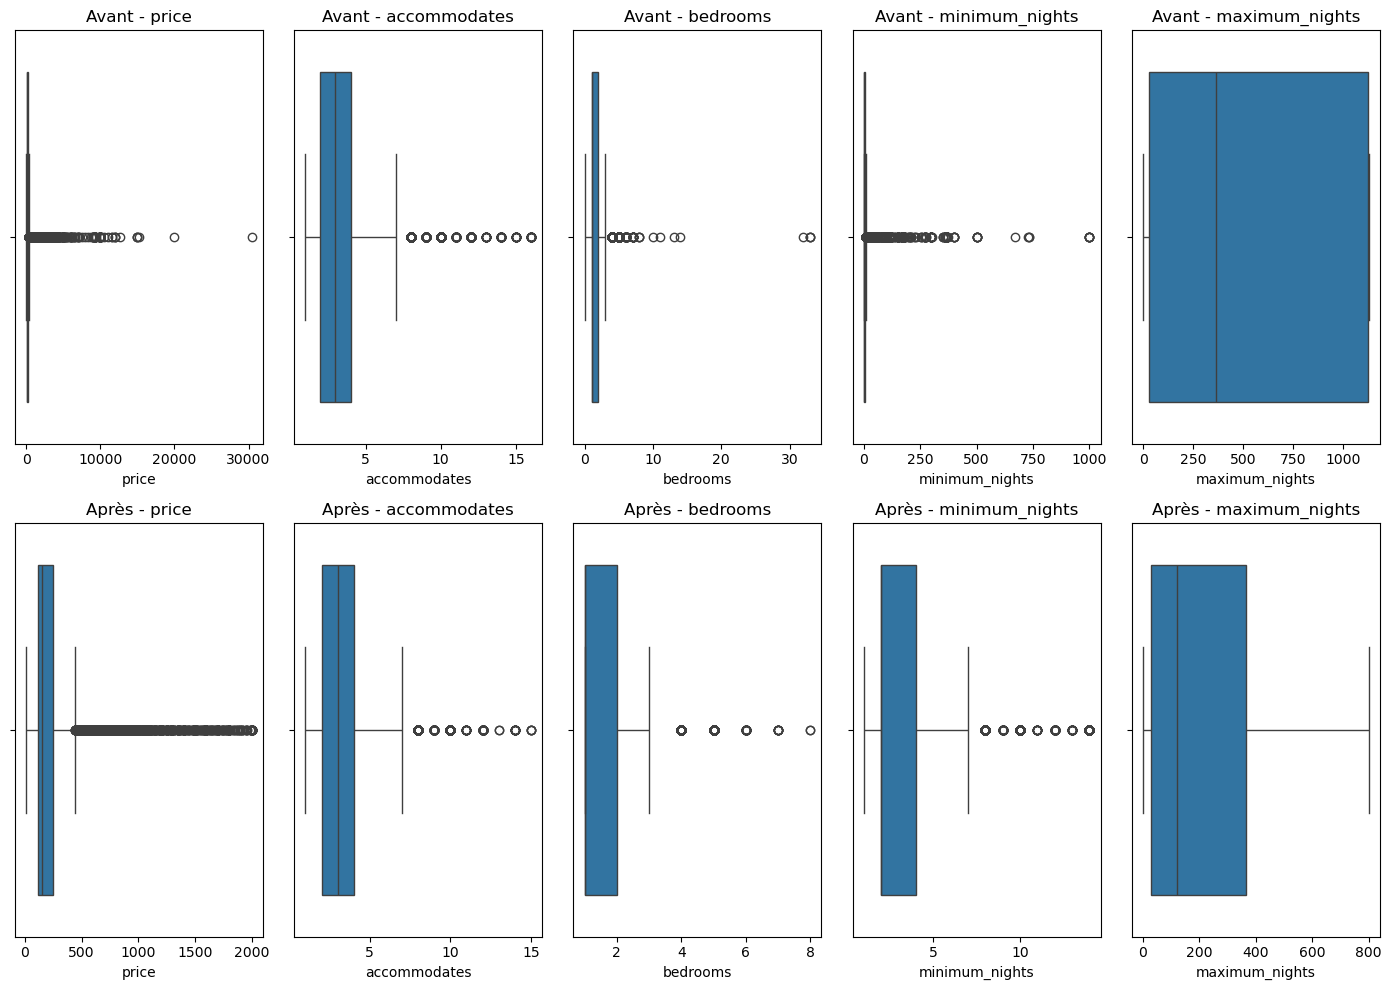

In [313]:
colonnes_pertinentes = ['price', 'accommodates', 'bedrooms', 'minimum_nights', 'maximum_nights']

def remove_outliers_iqr(df, columns):
    outliers = pd.DataFrame() 
    outliers_rows = []  # Liste pour stocker les indices des lignes contenant des outliers

    for col in columns:

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = max(Q1 - 1.5 * IQR, 1)  # Empêche les valeurs négatives
        upper_bound = Q3 + 3 * IQR

        if col == 'price':
            upper_bound = max(upper_bound, 2000)
        elif col == 'bedrooms':
            upper_bound = max(upper_bound, 10)
        elif col == 'accommodates':
            upper_bound = max(upper_bound, 15)
        elif col == 'minimum_nights':
            upper_bound = max(upper_bound, 14)
        elif col == 'maximum_nights':
            upper_bound = min(upper_bound, 830)

        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers_rows.extend(df[outliers[col]].index)
        print(f"{col}: Q1={Q1}, Q3={Q3}, IQR={IQR}, lower_bound={lower_bound}, upper_bound={upper_bound}")

    outliers_combined = outliers.any(axis=1)
    df_cleaned_no_outliers = df[~outliers_combined]

    print(f"\nNombre de lignes contenant des outliers: {len(set(outliers_rows))}")
    
    return df_cleaned_no_outliers, outliers_rows

df_cleaned_no_outliers, outliers_rows = remove_outliers_iqr(df_cleaned, colonnes_pertinentes)

print(f"Taille avant : {df_cleaned.shape}")
print(f"Taille après suppression des outliers : {df_cleaned_no_outliers.shape}")

print("\n📊 Statistiques avant suppression :")
print(df_cleaned[["price", "bedrooms", 'accommodates', 'minimum_nights', "maximum_nights"]].describe())

print("\n📊 Statistiques après suppression :")
print(df_cleaned_no_outliers[["price", "bedrooms", 'accommodates', 'minimum_nights', "maximum_nights"]].describe())

plt.figure(figsize=(14, 10))

for i, col in enumerate(colonnes_pertinentes, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data=df_cleaned, x=col)
    plt.title(f"Avant - {col}")

for i, col in enumerate(colonnes_pertinentes, 1):
    plt.subplot(2, 5, i + 5)
    sns.boxplot(data=df_cleaned_no_outliers, x=col)
    plt.title(f"Après - {col}")

plt.tight_layout()
plt.show()


# Prix en relation avec la note du bien

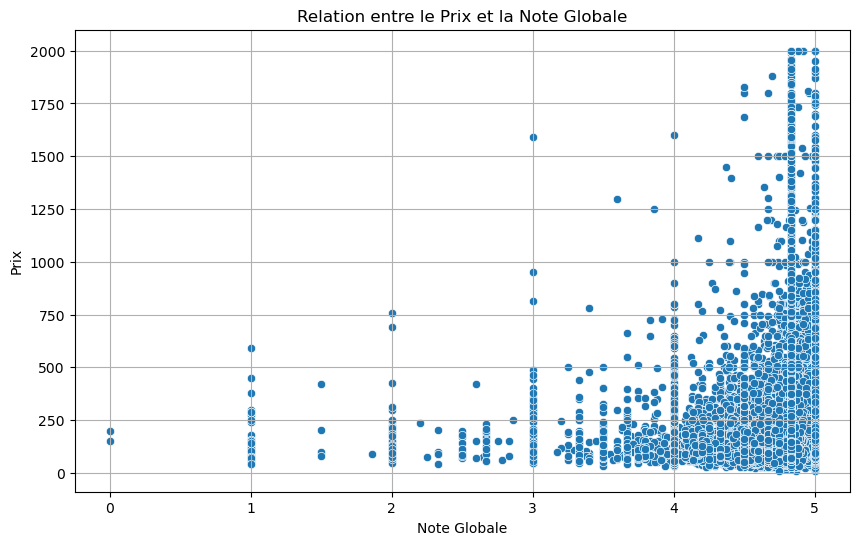

In [314]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_cleaned_no_outliers, x='review_scores_rating', y='price')

plt.title('Relation entre le Prix et la Note Globale')
plt.xlabel('Note Globale')
plt.ylabel('Prix')
plt.grid(True)
plt.show()

# Prix moyen par type de propriétés

   room_type_label       price
0  Entire home/apt  230.946500
1       Hotel room   98.144385
2     Private room  205.960000
3      Shared room  149.292092


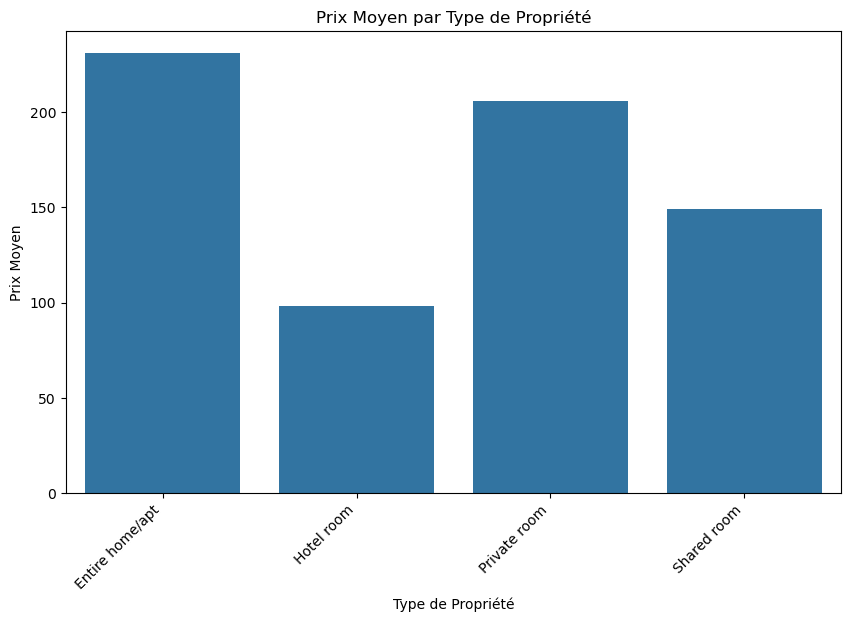

In [315]:
df_cleaned_no_outliers = df_cleaned_no_outliers.copy()

room_type_map = {
    0: 'Entire home/apt',
    1: 'Private room',
    2: 'Shared room',
    3: 'Hotel room'
}

df_cleaned_no_outliers['room_type_label'] = df_cleaned_no_outliers['room_type_encoded'].map(room_type_map)

prix_moyen_par_type = df_cleaned_no_outliers.groupby('room_type_label')['price'].mean().reset_index()

print(prix_moyen_par_type)

plt.figure(figsize=(10, 6))
sns.barplot(data=prix_moyen_par_type, x='room_type_label', y='price')
plt.title('Prix Moyen par Type de Propriété')
plt.xlabel('Type de Propriété')
plt.ylabel('Prix Moyen')
plt.xticks(rotation=45, ha='right')
plt.show()


# Répartition des Logements Disponibles et Non Disponibles

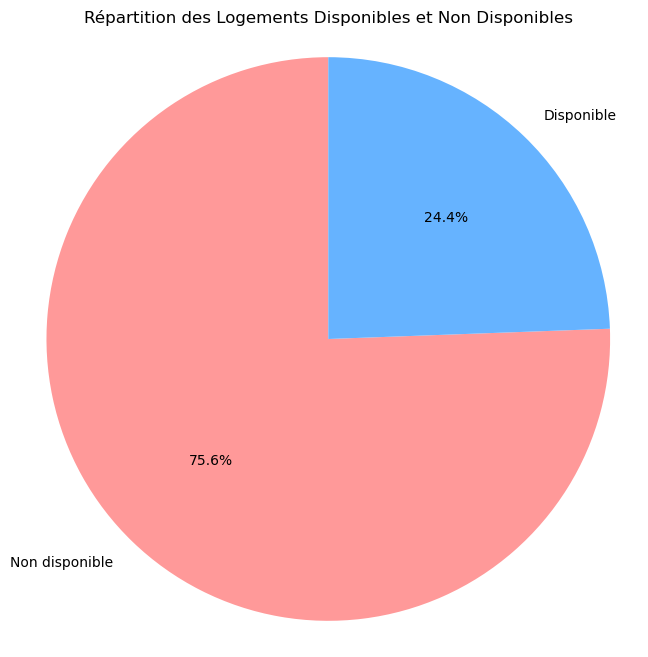

In [316]:

disponibilite = df_cleaned_no_outliers['instant_bookable'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(disponibilite, labels=['Non disponible', 'Disponible'], autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF'])
plt.title('Répartition des Logements Disponibles et Non Disponibles')
plt.axis('equal')
plt.show()


# 3.6 Normalisation des données
### Normalisation des données.  transformation des données pour qu'elles aient une moyenne de 0 et un écart-type de 1

In [317]:
df_cleaned_no_outliers = df_cleaned_no_outliers.copy()
df_cleaned_no_outliers = df_cleaned_no_outliers.drop('room_type_label', axis=1)
scaler = StandardScaler()

colonnes_numeriques = ['price', 'accommodates', 'bedrooms', 'latitude','longitude','minimum_nights','maximum_nights','number_of_reviews','review_scores_rating','bathrooms_count'] #latitude et longitude??

df_cleaned_no_outliers[colonnes_numeriques] = scaler.fit_transform(df_cleaned_no_outliers[colonnes_numeriques])

df_cleaned_no_outliers.head()

,price,accommodates,bedrooms,latitude,longitude,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,host_is_superhost,instant_bookable,room_type_encoded,neighbourhood_encoded,bathrooms_count
0,-0.576563,-0.828529,-0.573920,-1.751127,-0.731867,-0.455812,-0.926515,-0.412840,0.705750,False,True,0,10,-0.303892
2,-0.404311,0.344155,0.733376,-0.245673,0.289174,3.785517,-0.369405,5.781944,-0.138782,True,False,0,6,-0.303892
3,-0.337325,-0.242187,0.733376,0.589583,-0.027956,2.195018,0.939802,-0.395774,0.080171,False,False,0,11,-0.303892
5,-0.337325,-0.828529,-0.573920,-0.063445,0.775836,0.604520,-0.920944,0.406305,0.455518,False,False,0,15,-0.303892
6,-0.337325,-0.828529,-0.573920,1.186115,-0.101459,2.195018,-0.425116,0.099126,0.424239,False,False,0,3,-0.303892


 # 4. Séparation des Données (Train/Test Split)
### Préparer le dataset pour la modélisation en séparant les données en ensemble d'entraînement et de test.


In [318]:
# Sélectionner les colonnes pour les features (variables indépendantes)
X = df_cleaned_no_outliers.drop(columns=['price'])  # On enlève la colonne 'price' qui est la cible

# Sélectionner la variable cible (target)
y = df_cleaned_no_outliers['price']

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles train et test
print(f"Taille de l'ensemble d'entraînement : {X_train.shape} + {y_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape} + {y_test.shape}")

(37049, 13) (37049,)
Taille de l'ensemble d'entraînement : (29639, 13) + (29639,)
Taille de l'ensemble de test : (7410, 13) + (7410,)


# 5. Bonus: Préparation pour la Régression Linéaire
### Placeholder pour la future implémentation d'une régression linéaire.
### Cette section pourra être complétée ultérieurement avec la modélisation et l'évaluation.

In [319]:
# Convertir toutes les colonnes en types numériques (float)
X_train_numeric = X_train.copy()
X_train_numeric = X_train_numeric.astype(float)

# Ajouter une constante pour le calcul du VIF
X_vif = add_constant(X_train_numeric)

# Calculer le VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


                 Variable       VIF
0                   const  5.153174
1            accommodates  2.697339
2                bedrooms  2.904278
3                latitude  1.380365
4               longitude  1.043434
5          minimum_nights  1.113606
6          maximum_nights  1.058519
7       number_of_reviews  1.085891
8    review_scores_rating  1.085647
9       host_is_superhost  1.100726
10       instant_bookable  1.139249
11      room_type_encoded  1.126259
12  neighbourhood_encoded  1.410298
13        bathrooms_count  1.704358


In [320]:
# Initialisation du modèle de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur l'ensemble des features
#X_train = X_train.drop(columns=['latitude', 'longitude'])
#X_test = X_test.drop(columns=['latitude', 'longitude'])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)  # Erreur quadratique moyenne
r2 = r2_score(y_test, y_pred)  # Coefficient de détermination (R²)

print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"R² : {r2}")
print(f"Coefficients du modèle : {model.coef_}")
print(f"Intercept du modèle : {model.intercept_}")

Erreur quadratique moyenne (MSE) : 0.6680135511264652
R² : 0.3114883664879121
Coefficients du modèle : [ 0.11952265  0.24288514  0.01480816 -0.12228123  0.02502494  0.0241331
 -0.07420507  0.08154227 -0.04866263 -0.04657909 -0.03873327  0.00705152
  0.20148027]
Intercept du modèle : -0.03152930840668915


# 6. Conclusion et Perspectives

### Ce notebook constitue la base du prétraitement des données pour le projet AirBnB.
### Chaque membre pourra ajuster ou compléter les sections selon l'évolution du projet.
### Pensez à ajouter des commentaires et des visualisations pertinentes pour documenter vos choix.